# 目标
- 访问像素并修改；
- 访问图像属性；
- 设置图像区域（ROI）；
- 切分与合并图像；

相较于OpenCV，这一小节的大部分操作与NumPy关系密切。要用OpenCV编写最优的代码需要熟练掌握Numpy。

# 1. 访问并修改像素值
首先加载彩色图像：

In [2]:
from __future__ import print_function
import cv2
import numpy as np

img = cv2.imread('../data/messi5.jpg')

可以通过行与列的坐标来访问像素的值。对于**BGR**图像，会返回一个包含蓝、绿、红三个颜色值构成的数组。对于灰度图像，返回其对应的强度值。

In [3]:
px = img[100, 100]
print(px)

[156 166 200]


In [4]:
blue = img[100, 100, 0]
print(blue)

156


可以以相同的方法改变像素的值：

In [5]:
img[100, 100] = [255, 255, 255]
print(img[100, 100])

[255 255 255]


**警告**  
**Numpy**是一个经过优化的数组计算库。逐个访问像素值并修改运行起来会非常慢，不做推荐。

> **注意**  
> 上面的方法通常用于选择数组的一个区域，例如前5行后3列这样的区域。对于单个像素的访问，Numpy提供了**array.item()**和**array.itemset()**这样的方法性能会更好一些。但是这种方法总是返回一个标量。因此如果想要访问所有的BGR值，需要单独的调用该函数。

更好的像素访问和编辑方法：

In [6]:
# 访问红色值
print( img.item(10, 10, 2) )

# 修改红色值
img.itemset((10, 10, 2), 100)
print( img.item(10, 10, 2) )

59
100


# 2. 访问图像属性
图像属性包括行数、列数、通道数、图像数据类型、像素数等

可以用**img.shape**来获得图像的大小，它的返回值是行数、列数和通道数（如果是彩色图像，才会有通道数）：

In [7]:
print(img.shape)

(342, 548, 3)


> **注意**  
> 如果是灰度图像，返回的元组只包含行数和列数。因此最好先检查加载的图像是灰度还是彩色的。

像素总数可以用**img.size**来获得：

In [8]:
print(img.size)

562248


图像的数据类型可以用**img.dtype**获得：

In [9]:
print(img.dtype)

uint8


> **注意**  
> **img.dtype**在调试的时候非常重要，因为大量的OpenCV-Python的代码错误都是由无效的类型引起的。

# 3. 图像区域（ROI）
在图像处理中，经常需要操作图像的某个区域。例如在人眼检测中，首先对整幅图像进行面部检测，当获得面部区域后，在面部区域进行人眼检测，而不是在整幅图像上进行人眼检测。这回提高精确度（因为人眼总是在面部）和性能（只需要搜索一个小的范围）。

ROI由Numpy的索引获得，下面我们选择图像的一个区域，并拷贝到另外一个区域：

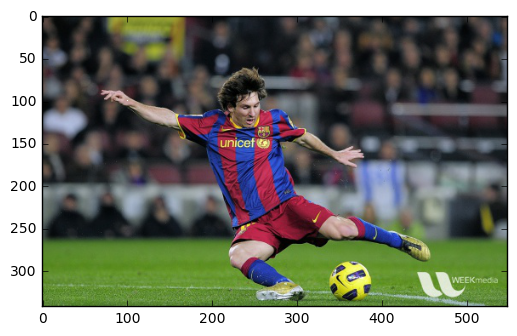

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# 显示原始图像
plt.imshow(img[:, :, ::-1])

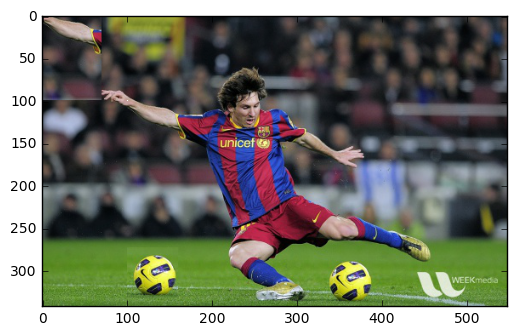

In [13]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

# 显示修改后的图像
plt.imshow(img[:, :, ::-1])

# 4. 分离与合并图像通道
有时需要对图像的不同通道进行分别操作。因此需要将BGR图像分离为三个独立通道。有时，又有可能需要将分离的通道合并为BGR图像。可以用以下的代码进行操作：

In [18]:
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

或者：

In [19]:
b = img[:, :, 0]

假设需要将像素的红色值都设置为0，并需要将图像的通道进行分离，在设置为0.可以简单地用Numpy的索引功能来完成，这样的速度更快：

In [20]:
img[:, :, 2] = 0

**警告**  
**cv2.split()**是一个时间复杂度很高的操作，因此除非必要尽量使用Numpy的索引。

# 5. 为图像添加边框（Padding）
如果想要在图像周围创建一个边框，可以使用**cv2.copyMakeBorder()**函数。该函数被更多的用于卷积运算，例如0填充等。该函数需要以下参数：
- **src** - 输入图像。
- **top, bottom, left, right** - 对应方向边框宽度（单位为像素）。
- **borderType** - 该标志定义了边框的类型，可以是下面的值：
    - **cv2.BORDER_CONSTANT** - 添加一个常数颜色值的边框，该值由下一个参数给定。
    - **cv2.BORDER_REFLECT** - 边框将镜像边缘的颜色，例如：$[hgfedcba]_{padding}[abcdefgh]_{img}[hgfedcba]_{padding}$  
    - **cv2.BORDER_REFLECT_101**或**cv2.BORDER_DEFAULT** - 同上，唯一的差别是：$[hgfedcb]_{padding}[abcdefgh]_{img}[gfedcba]_{padding}$
    - **cv2.BORDER_REPLICATE** - 重复边缘的元素，例如：$[aaaaaaa]_{padding}[abcdefgh]_{img}[hhhhhhh]_{padding}$
    - **cv2.BORDER_WRAP** - 看上去是这样：$[cdefgh]_{padding}[abcdefgh]_{img}[abcdef]_{padding}$
- **value** - 边框的类型为cv2.BORDER_CONSTANT时的常数值。

下面的例子显示了各种边框的类型：

(<matplotlib.axes._subplots.AxesSubplot at 0x117069cc0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

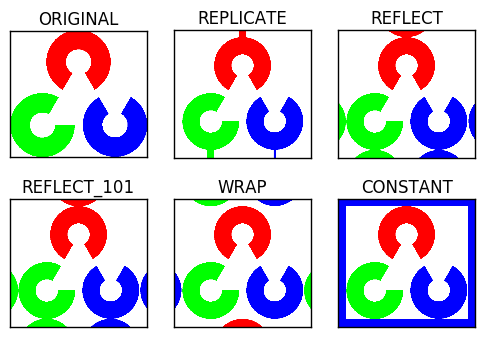

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

BLUE = [255, 0, 0]

img = cv2.imread('../data/opencv-logo.png')

bw = 40 # 边框的宽度

replicate = cv2.copyMakeBorder(img, bw, bw, bw, bw, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, bw, bw, bw, bw, cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(img, bw, bw, bw, bw, cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img, bw, bw, bw, bw, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, bw, bw, bw, bw, cv2.BORDER_CONSTANT, value=BLUE)

plt.subplot(231), plt.imshow(img[:,:,::-1]), plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(replicate[:,:,::-1]), plt.title('REPLICATE'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(reflect[:,:,::-1]), plt.title('REFLECT'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(reflect_101[:,:,::-1]), plt.title('REFLECT_101'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(wrap[:,:,::-1]), plt.title('WRAP'), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(constant[:,:,::-1]), plt.title('CONSTANT'), plt.xticks([]), plt.yticks([])

在用matplotlib显示图像时，需要RGB通道的图像，因此使用**img[:, :, ::-1]**来调整图像的通道顺序。